In [1]:
# 2020-10-17 created by Akson

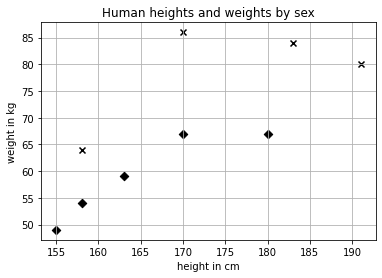

In [3]:
# code3.1

import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([[158, 64], [170, 86], [183, 84], [191, 80], [155, 49], [163, 59], [180, 67], [158,54], [170, 67]])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

plt.figure()
plt.title('Human heights and weights by sex')
plt.xlabel('height in cm')
plt.ylabel('weight in kg')

for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c = 'k', marker = 'x' if y_train[i] == 'male' else 'D')

plt.grid(True)
plt.show()

In [15]:
# code3.2
# 手动实现KNN算法

x = np.array([[155, 70]])
distances = np.sqrt(np.sum((X_train - x) ** 2, axis = 1))
print(distances)

nearest_neighbor_indices = distances.argsort()[: 3]
# print(nearest_neighbor_indices)
nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indices)
print(nearest_neighbor_genders)

from collections import Counter
b = Counter(nearest_neighbor_genders)
b.most_common(1)[0][0]

[ 6.70820393 21.9317122  31.30495168 37.36308338 21.         13.60147051
 25.17935662 16.2788206  15.29705854]
['male' 'female' 'female']


'female'

In [27]:
# code3.3
# 使用scikit-learn实现KNN

from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

# 将‘male’与‘female’转换为二值的‘1’和‘0’
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
print(y_train_binarized)

K = 3
clf = KNeighborsClassifier(n_neighbors = K)
clf.fit(X_train, y_train_binarized.reshape(-1))  # 这里用reshape(-1)是为了将原本的二维向量变成一维的
# print(y_train_binarized.reshape(-1))
prediction_binarized = clf.predict(np.array([155, 70]).reshape(1, -1)) # 注意预测结果都是array，如果测试数据只有一个的话，记得要取[0]索引，也可不加

# 这里还需要将二值0，1的结果转换为‘male’和‘female’
prediction_label = lb.inverse_transform(prediction_binarized)
print(prediction_label)

[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
['female']


In [34]:
# code3.4
# 使用测试数据集来测试KNN

X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = ['male', 'male', 'female', 'female']
y_test_binarized = lb.transform(y_test)
print('Binarized labels: %s' % y_test_binarized.T[0])
predictions_binarized = clf.predict(X_test)
print('Binarized predictions: %s' % predictions_binarized)
print('Predicted labels: %s' % lb.inverse_transform(predictions_binarized))

Binarized labels: [1 1 0 0]
Binarized predictions: [0 1 0 0]
Predicted labels: ['female' 'male' 'female' 'female']


In [35]:
# code3.5
# 测试准确率

from sklearn.metrics import accuracy_score

print('Accuracy: %s' % accuracy_score(y_test_binarized, predictions_binarized))

Accuracy: 0.75


In [36]:
# code3.6
# 测试精确率（真阳 / 真阳 + 假阳）（这个例子可男可女，但现在是把1当男，所以男作阳性）

from sklearn.metrics import precision_score

print('Precision: %s' % precision_score(y_test_binarized, predictions_binarized))

Precision: 1.0


In [37]:
# code3.7
# 测试召回率（真阳 / 真阳 + 假阴）

from sklearn.metrics import recall_score

print('Recall: %s' % recall_score(y_test_binarized, predictions_binarized))

Recall: 0.5


In [38]:
# code3.8
# 测试F1得分（精准率与召回率的调和平均值）

from sklearn.metrics import f1_score

print('F1 score: %s' % f1_score(y_test_binarized, predictions_binarized))

F1 score: 0.6666666666666666


In [39]:
# code3.9
# 测试马修斯相关系数（MCC）

from sklearn.metrics import matthews_corrcoef

print('Matthews corrcoef: %s' % matthews_corrcoef(y_test_binarized, predictions_binarized))

Matthews corrcoef: 0.5773502691896258


In [44]:
# code3.10
# 测试的分类评分报告（精准率，召回率，F1得分）

from sklearn.metrics import classification_report

# 对男性测试评分结果
print(classification_report(y_test_binarized, predictions_binarized, target_names = ['male'], labels = [1]))
# 对女性测试评分结果
# print(classification_report(y_test_binarized, predictions_binarized, target_names = ['female'], labels = [0]))
# 对男女一起的评分结果
# print(classification_report(y_test_binarized, predictions_binarized, target_names = ['male', 'female'], labels = [1, 0]))

              precision    recall  f1-score   support

        male       1.00      0.50      0.67         2

   micro avg       1.00      0.50      0.67         2
   macro avg       1.00      0.50      0.67         2
weighted avg       1.00      0.50      0.67         2



In [46]:
# code3.11
# 回归模型测试，已知身高和性别，预测体重

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train = np.array([[158, 1], [170, 1], [183, 1], [191, 1], [155, 0], [163, 0], [180, 0], [158, 0], [170, 0]])
y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

X_test = np.array([[168, 1], [180, 1], [160, 0], [169, 0]])
y_test = [65, 96, 52, 67]

K = 3
clf = KNeighborsRegressor(n_neighbors = K)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Predicted weights: %s' % predictions)
print('Coefficient of determination: %s' % r2_score(y_test, predictions))
print('Mean absolute error: %s' % mean_absolute_error(y_test, predictions))
print('Mean squared error: %s' % mean_squared_error(y_test, predictions))

Predicted weights: [70.66666667 79.         59.         70.66666667]
Coefficient of determination: 0.6290565226735438
Mean absolute error: 8.333333333333336
Mean squared error: 95.8888888888889


In [48]:
# code3.12
# 数据取值的不同范围的影响
from scipy.spatial.distance import euclidean

# 当身高单位为厘米时
X_train = np.array([[170, 1], [160, 0]])
x_test = np.array([164, 1]).reshape(1, -1)
print(euclidean(X_train[0, :], x_test))
print(euclidean(X_train[1, :], x_test))


# 当身高单位为米时
X_train = np.array([[1.7, 1], [1.6, 0]])
x_test = np.array([1.64, 1]).reshape(1, -1)
print(euclidean(X_train[0, :], x_test))
print(euclidean(X_train[1, :], x_test))

6.0
4.123105625617661
0.06000000000000005
1.0007996802557442


In [52]:
# code3.13
# 特征的标准化转换

from sklearn.preprocessing import StandardScaler

X_train = np.array([[158, 1], [170, 1], [183, 1], [191, 1], [155, 0], [163, 0], [180, 0], [158, 0], [170, 0]])
y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

print(X_train)
print(X_train_scaled)

X_test = np.array([[168, 1], [180, 1], [160, 0], [169, 0]])
y_test = [65, 96, 52, 67]
X_test_scaled = ss.transform(X_test)

clf.fit(X_train_scaled, y_train)
predictions = clf.predict(X_test_scaled)

print('Predicted weights: %s' % predictions)
print('Coefficient of determination: %s' % r2_score(y_test, predictions))
print('Mean absolute error: %s' % mean_absolute_error(y_test, predictions))
print('Mean squared error: %s' % mean_squared_error(y_test, predictions))

[[158   1]
 [170   1]
 [183   1]
 [191   1]
 [155   0]
 [163   0]
 [180   0]
 [158   0]
 [170   0]]
[[-0.9908706   1.11803399]
 [ 0.01869567  1.11803399]
 [ 1.11239246  1.11803399]
 [ 1.78543664  1.11803399]
 [-1.24326216 -0.89442719]
 [-0.57021798 -0.89442719]
 [ 0.86000089 -0.89442719]
 [-0.9908706  -0.89442719]
 [ 0.01869567 -0.89442719]]
Predicted weights: [78.         83.33333333 54.         64.33333333]
Coefficient of determination: 0.6706425961745109
Mean absolute error: 7.583333333333336
Mean squared error: 85.13888888888893
